## Tensorflow TF_data
- Data Generator와 같은 것
- 장점 : 좀더 커스터마이징이 좋음
- 단점 : 복잡

In [44]:
import os
from glob import glob

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

train_paths = glob('../dataset/cifar/train/*.png')
data0 = train_paths[0]
print(len(train_paths))

50000


In [45]:
batch_size = 8

## Tensorflow 의 Data 기능
- Generator 기능임

(8, 32, 32, 3)


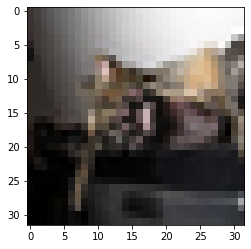

In [46]:
# path를 주면 image를 읽어주는 함수
def read_image(path):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    return image

# tf의 data에서 dataset tensor로 읽어오기
data = tf.data.Dataset.from_tensor_slices(train_paths)
data = data.map(read_image) # 이미지 읽어옴 - 함수로
data = data.batch(batch_size)
data = data.shuffle(buffer_size = len(train_paths)) # shuffle 기능

# shuffle 후 한장씩 꺼내옴
# 매번 다른이미지 생성됨
tf_image = next(iter(data))
print(tf_image.shape)

plt.imshow(tf_image[0])
plt.show()

## Label하고 같이 넣기

In [47]:
def get_label(path):
    return path.split('_')[-1].replace('.png','')

print(data0, get_label(data0))

label_names = [get_label(path) for path in data_paths]
print(len(label_names))

class_names = np.unique(label_names)
print(class_names)

../dataset/cifar/train\0_frog.png frog
50000
['airplane' 'automobile' 'bird' 'cat' 'deer' 'dog' 'frog' 'horse' 'ship'
 'truck']


## Data Generator 방법1
- image 데이터(train_path)와 라벨이름(label_names) 데이터 Generator로 받아오기
- 인자 2개로

(8, 32, 32, 3) (8,)


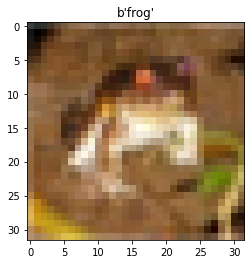

In [48]:
# path를 주면 image와 label을 읽어주는 함수
def read_image_label(path, label):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    return image, label

# tf의 data에서 dataset tensor로 읽어오기
# train data path 와 label names data에 주고 뽑아주세요
data = tf.data.Dataset.from_tensor_slices((train_paths, label_names)) 
data = data.map(read_image_label) # 이미지 읽어옴 - 함수로
data = data.batch(batch_size)
data = data.repeat()

image, label = next(iter(data))
print(image.shape, label.shape)

plt.imshow(image[0])
plt.title(np.array(label[0]))
plt.show()

## Data Generator 방법2
- Tensorflow로 Lable 얻는법 - 방법2
- image 데이터(train_path)와 라벨이름(label_names) 데이터 Generator로 받아오기

In [56]:
def get_label_ver2(path):
    fname = tf.strings.split(path, '_')[-1]
    cls_name = tf.strings.regex_replace(fname, '.png', '')
    return tf.cast(class_names == cls_name, tf.uint8) # one hot

# path를 주면 image와 label을 읽어주는 함수
def read_image_label_ver2(path):
    # read image
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    
    # get label
    label = get_label_ver2(path)
    
    return image, label

Tensor("args_0:0", shape=(), dtype=string)
(8, 32, 32, 3) (8, 10)


c:\users\urse\anaconda3\envs\untitled\lib\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


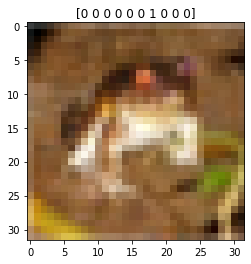

In [59]:
# train data path 와 label names data에 주고 뽑아주세요
data = tf.data.Dataset.from_tensor_slices(train_paths) 
data = data.map(read_image_label_ver2) # 이미지 읽어옴 - 함수로
data = data.batch(batch_size)
data = data.repeat()

# 테스트
image, label = next(iter(data))
print(image.shape, label.shape)

plt.imshow(image[0])
plt.title(np.array(label[0]))
plt.show()

## 최종 필요한 것

- data_paths 데이터 리스트를 얻는다.
- get_label 를 얻을 수 있다.
- dataset 을 넣고 image 를 얻을 수 있고 -> 해당내용에서  get_label로 얻을 수 있다.

### 순서 
- 1(data_paths) -> 2(dataset) -> 3(map함수) -> 4(read_image_label) -> 5(get_label)